In [5]:
# Neccesary Imports
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras

In [6]:
# read pre-processed data
movie_df = pd.read_csv('dimension_reduce.csv')

In [7]:
# standarization feature scaling
dataset = movie_df
mu = np.mean(dataset,axis =0)
# mu
sigma = np.std(dataset,axis = 0)
# sigma
normal_df = (dataset-mu)/sigma
# normal_df

In [8]:
features = movie_df.iloc[:,0:12].drop('imdb_score',axis=1)

In [9]:
labels = movie_df['imdb_score'].values

In [10]:
normalized_features = normal_df.iloc[:,0:12].drop('imdb_score',axis=1)

In [11]:
n_dim = features.shape[1]
n_training_samples = features.shape[0]

In [12]:
f = np.reshape(np.c_[np.ones(n_training_samples),normalized_features],[n_training_samples,n_dim + 1])
l = np.reshape(labels,[n_training_samples,1])
n_dim = f.shape[1]

In [13]:
# split the data 
rnd_indices = np.random.rand(len(f)) < 0.80   
train_x = f[rnd_indices]
train_y = l[rnd_indices]
test_x = f[~rnd_indices]
test_y = l[~rnd_indices]
    
learning_rate = 0.01
training_epochs = 1000
loss_history = np.empty(shape=[1],dtype=float)

In [14]:
# build computational graph

# model variable / parameter
W = tf.Variable(tf.ones([n_dim,1]))

# input
X = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,1])
#output
model = tf.matmul(X, W)

# init
init = tf.global_variables_initializer()

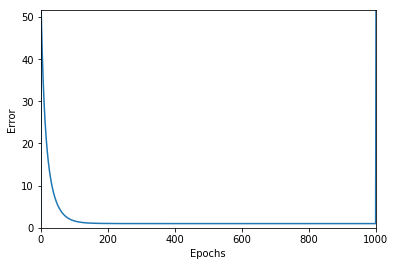

MSE: 1.0182


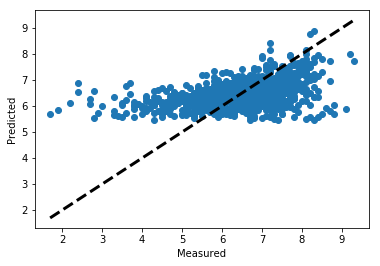

In [17]:
# loss function
loss = tf.reduce_mean(tf.square(model - Y))
# reduce the loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(loss)

# running the computational graph
sess = tf.Session()
sess.run(init)

for i in range(1000):
    sess.run(train,{X:train_x,Y:train_y})
    loss_history = np.append(loss_history,sess.run(loss,{X: train_x,Y: train_y}))
    
plt.plot(range(len(loss_history)),loss_history)
plt.axis([0,training_epochs,0,np.max(loss_history)])
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()
    
pred_y = sess.run(model, {X: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse)) 
    
fig, ax = plt.subplots()
ax.scatter(test_y, pred_y)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
# end with close
sess.close()